# Week 2 - Sampling & Reliability

### Yimin Li liym15@uchicago.edu

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Pitch the Domain of your Project*</span>

<span style="color:red">In the two cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words) and **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words)? [**Note**: your individual or collective project can change over the course of the quarter if new data and/or analysis opportunities arise or if old ones fade away.]

## ***What?*** 

We are interesting to find a divergence on Chinese different attitudes towards democracy on social media. For example, some Chinese netizens criticized Chinese government for being autocracy while others have witnessed "the evilness of democracy, particularly during the recent Hong Kong protest and covid-19." I am particularly interested in researching on this pattern by analyzing the Twitter. In this project, I would lay emphasis on understanding Chinese attitude towards democracy on Twitter, trying to bring out a big picture about how they viewed Chinese democracy on Twitter? Are they positive, neutral or negative towards democracy in China? Also, what factor plays a more important role in shaping their attitude towards democracy?

## ***Why?*** 

The project mainly challenges the "take-it-for-granted" norms that everyone criticized the autocracy and embraced the democracy. Different from Western countries embracing democracy without any hesitation, citizens in authoritarian countries (i.e. China) might have a divergence when talking about democracy. Understanding their attitude on democracy on social media would provide a new form of evidence different from traditional survey data approach. It can help us better understand general Chinese attitude on democracy (i.e. how much of Chinese netizens are positive towards democracy) as well as implying to what extent government has successfully shaped citizens' attitude. Also, this project may provide a pivot study for future study applying to all authoritarian countries and other languages besides English, providing a new method to understand public opinion apart from traditional, costly survey approach.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

Due to content analysis language restriction and feasibility for web scraping, I would use data from Twitter (or Weibo) about democracy published by Chinese netizens. I would first web scrape the post about democracy on Twitter in Chinese, and used Google Translate to translate it into English for content analysis. It would pose strong doubt on external validity of our research, since Chinese expressing opinion on Twitter is very unlikely to represent the public opinion of Chinese citizens. However, since Twitter is blocked in China (only accessible for those living outside China or using VPN), it is still very interesting to analyze these kind of citizens' attitude who have been more exposed to Western democracy and less likely to be influenced by Chinese propaganda campaign. Then, we could extraploate the technique to Weibo (China's biggest social media) to have a more general approach.

My data is highly limited and biased. However, understanding those citizens exposed to Western values can be regarded as a pivot study for understanding overall Chinese attitude on Weibo at a later stage. If those citizens (who use Twitter and expressed their opinion out) are still hatred towards democracy, it is quite more interesting to study why they are not influenced by Western norms and it might become a solid evidence that some Chinese authoritarian norms are inborn, rather than shaped by the propaganda campaign and Firewall, depiciting new approach of the authoritarian resilience in China.

## <span style="color:red">*Your turn*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides in the Assignment link on Canvas, or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

### Dataset

In this demo dataset, I manually collected several posts (~25 posts) related to democracy in Chinese on Twitter. Then, I asked five friends to evaluate their attitude towards Chinese democracy (1-5, 1=strongly negative, 5=strongly positive). I also introduced the coder 5 (me) who is more gentle in coding the data, whose score tend to be more closed to the middle compared to other coders (It acts as an outlier). Then, I translated the post to English by using Google Translate and stored the coders' score, plain text and date of the post in one excel file.
(Note: For future study, web scraping technique would be applied.)

In [5]:
df = pd.read_csv("demo_data.csv")
df.head()

,coder1,coder2,coder3,coder4,coder5(gentle),coder6,Text,Date
0,5,5,5,4,4,4,Guo Jiao ’s main slogan: Save 1.4 billion Chin...,2020/4/22
1,3,5,5,4,3,4,"Japan only lost life, but China lost the entir...",2020/4/21
2,1,1,1,1,2,1,The scumbag reporter from China and the offici...,2020/4/20
3,1,1,1,1,2,1,"Since then, the Chinese economy has left Chine...",2020/4/22
4,5,5,5,5,4,5,Jianguo even took the lead in planning the rio...,2020/4/17


In [23]:
anno = AnnotationsContainer.from_array(df.values[:,:6])
anno.annotations

array([[4, 4, 4, 3, 3, 3],
       [2, 4, 4, 3, 2, 3],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [4, 4, 4, 4, 3, 4],
       [0, 0, 1, 1, 2, 1],
       [4, 4, 4, 4, 3, 4],
       [4, 4, 4, 4, 3, 3],
       [0, 0, 1, 1, 1, 0],
       [4, 4, 4, 4, 3, 4],
       [0, 0, 0, 0, 1, 0],
       [4, 4, 4, 4, 3, 4],
       [3, 4, 4, 4, 3, 4],
       [4, 3, 4, 3, 4, 4],
       [2, 2, 2, 3, 2, 3],
       [0, 0, 1, 1, 2, 1],
       [2, 3, 2, 2, 2, 2],
       [2, 1, 1, 1, 2, 2],
       [4, 4, 3, 3, 3, 4],
       [4, 3, 3, 4, 2, 3],
       [3, 2, 3, 4, 2, 3],
       [0, 0, 0, 0, 1, 0],
       [4, 3, 4, 4, 3, 4],
       [3, 4, 4, 3, 2, 3],
       [3, 4, 3, 3, 3, 4]])

In [24]:
anno.labels

[1, 2, 3, 4, 5]

### Annotation Statistics

#### First, we compute the "confusion matrix" between two coders. As is written in the above mentioned notes, coder 5 tends to be a more outlier than other coder. Hence, we would copute two confusion matrixs: One is between any two coder (Coder 1 and 2), the other is between regular coder and outlier (Coder 1 and Coder 5).

In [36]:
pyanno.measures.agreement.labels_frequency(anno.annotations,5)

array([0.18      , 0.10666667, 0.13333333, 0.24      , 0.34      ])

[[7. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 3.]
 [0. 0. 0. 3. 7.]]


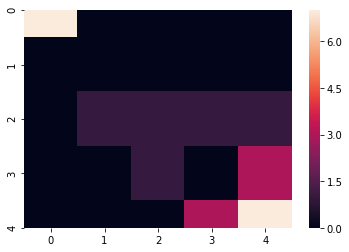

In [37]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],5)
print(c)
ac = seaborn.heatmap(c)
plt.show()

[[0. 5. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 2. 2. 0.]
 [0. 0. 1. 8. 1.]]


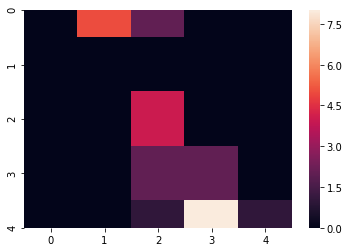

In [47]:
c2 = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,4],5)
print(c2)
ac2 = seaborn.heatmap(c2)
plt.show()

Based on the confusion matrixs, we can calculate the Scott's $\pi$

In [49]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

0.43246311010215677

In [50]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,4])

0.07216494845360817

We can easily see that the scotts_pi score with an outlier is much smaller than between two regular coders, which prove our hypothesis. Then, we can then calculate the Fleiss' $\kappa$ and Krippendorff's $\alpha$ to measure the whole accuracy.

In [51]:
fleiss_kappa(anno.annotations[::])

0.31699384365199207

In [54]:
krippendorffs_alpha(anno.annotations[::])

0.8580838802625259

#### Then,we analyze Cohen's $\kappa$ to further measure agreement between coders

[[1.         0.43438914 0.51403888 0.42105263 0.16512059 0.51508621]
 [0.43438914 1.         0.50221239 0.29956897 0.00181488 0.34354486]
 [0.51403888 0.50221239 1.         0.62284483 0.11380597 0.51716738]
 [0.42105263 0.29956897 0.62284483 1.         0.03288201 0.56989247]
 [0.16512059 0.00181488 0.11380597 0.03288201 1.         0.03474903]
 [0.51508621 0.34354486 0.51716738 0.56989247 0.03474903 1.        ]]


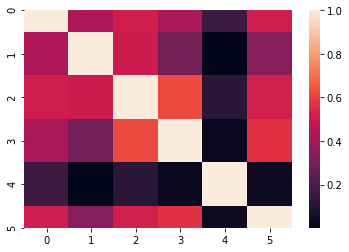

In [53]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)
ax = seaborn.heatmap(m)
plt.show()

In [55]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.3392113495473198

In [59]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.6526021685800296

The average score of Cohen's $\kappa$ for all pairs is low. It might because of the outlier of coder 5. As is shown in the above heatmap, the coder 5 might not be reliable because of its "gentle" scoring. But we would see the weighted score is much better, which its weighted score is almost two times better than the unweighted one.

#### We can also explore the correlations of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders:

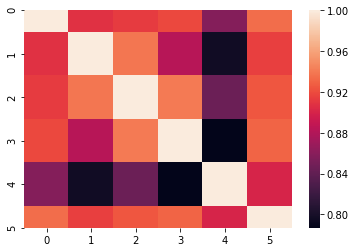

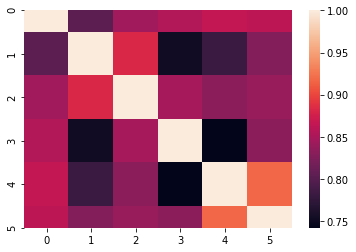

0.8928470480674016 0.8329597174340441


In [60]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

As shown in the heatmap, the correlation of values (Pearson's $\rho$) are strong between different coders (except for the outlier coder). But interestingly we would find that the correlation of ranks (Spearman's $\rho$) are not as strong as the value.

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

In [71]:
# create a new instance of model, with 5 label classes and 6 annotators.
model = ModelB.create_initial_state(5, 6)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[0.7155455  0.14705204 0.05147758 0.08364864 0.00227623]
  [0.26453444 0.48137594 0.20199038 0.03301225 0.01908699]
  [0.01818962 0.12162342 0.55136725 0.16025988 0.14855983]
  [0.04925214 0.04491007 0.20334391 0.59001209 0.11248178]
  [0.05820301 0.0583554  0.09317065 0.19311456 0.59715639]]

 [[0.77509531 0.14956266 0.03533185 0.00564682 0.03436337]
  [0.08952038 0.54769663 0.28354177 0.03041046 0.04883075]
  [0.04794073 0.3110367  0.51323059 0.05187348 0.0759185 ]
  [0.01567605 0.07324622 0.10747966 0.75367284 0.04992523]
  [0.02142042 0.01025132 0.08636324 0.11565362 0.7663114 ]]

 [[0.740611   0.20761977 0.04820887 0.00119323 0.00236713]
  [0.11364362 0.57563858 0.06682363 0.2239854  0.01990876]
  [0.14580353 0.07717188 0.685365   0.07477331 0.01688629]
  [0.08413806 0.03274168 0.30970424 0.47633843 0.09707758]
  [0.05959516 0.06143551 0.09184129 0.11830662 0.66882141]]

 [[0.77056757 0.14072077 0.04008837 0.0348985  0.0137248 ]
  [0.16142491 0.66592083 0.12632795 0.03967668 0.0

In [74]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[8.33042605e-001 1.25211161e-001 4.17462347e-002 0.00000000e+000
   0.00000000e+000]
  [2.02974698e-001 6.04116712e-001 1.52634142e-001 4.02744475e-002
   0.00000000e+000]
  [3.98823792e-002 1.19538842e-001 6.80832614e-001 1.19873430e-001
   3.98727353e-002]
  [0.00000000e+000 3.77461159e-002 1.50413625e-001 6.60103937e-001
   1.51736322e-001]
  [0.00000000e+000 0.00000000e+000 3.84372919e-002 1.52037939e-001
   8.09524769e-001]]

 [[8.33042605e-001 1.25220342e-001 4.17370536e-002 3.77716418e-103
   0.00000000e+000]
  [2.02974698e-001 6.35910945e-001 1.20831610e-001 4.02827465e-002
   0.00000000e+000]
  [3.98823792e-002 1.27913490e-001 6.32660028e-001 1.59258514e-001
   4.02855885e-002]
  [0.00000000e+000 3.77524110e-002 1.55401736e-001 5.99235082e-001
   2.07610771e-001]
  [0.00000000e+000 0.00000000e+000 3.39364231e-002 1.73102104e-001
   7.92961473e-001]]

 [[7.92966443e-001 1.65296503e-001 4.17370536e-002 0.00000000e+000
   0.00000000e+000]
  [1.20859594e-001 7.18026050e-001 1.20

In [75]:
model = ModelB.create_initial_state(5, 6)
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[8.33042605e-001 1.25211161e-001 4.17462347e-002 0.00000000e+000
   0.00000000e+000]
  [2.02974698e-001 6.04116712e-001 1.52634142e-001 4.02744475e-002
   0.00000000e+000]
  [3.98823792e-002 1.19538842e-001 6.80832614e-001 1.19873430e-001
   3.98727353e-002]
  [0.00000000e+000 3.77461159e-002 1.50413625e-001 6.60103937e-001
   1.51736322e-001]
  [0.00000000e+000 0.00000000e+000 3.84372919e-002 1.52037939e-001
   8.09524769e-001]]

 [[8.33042605e-001 1.25220342e-001 4.17370536e-002 3.77716418e-103
   0.00000000e+000]
  [2.02974698e-001 6.35910945e-001 1.20831610e-001 4.02827465e-002
   0.00000000e+000]
  [3.98823792e-002 1.27913490e-001 6.32660028e-001 1.59258514e-001
   4.02855885e-002]
  [0.00000000e+000 3.77524110e-002 1.55401736e-001 5.99235082e-001
   2.07610771e-001]
  [0.00000000e+000 0.00000000e+000 3.39364231e-002 1.73102104e-001
   7.92961473e-001]]

 [[7.92966443e-001 1.65296503e-001 4.17370536e-002 0.00000000e+000
   0.00000000e+000]
  [1.20859594e-001 7.18026050e-001 1.20

#### Once we have the model, we can make inferences about the true label classes.

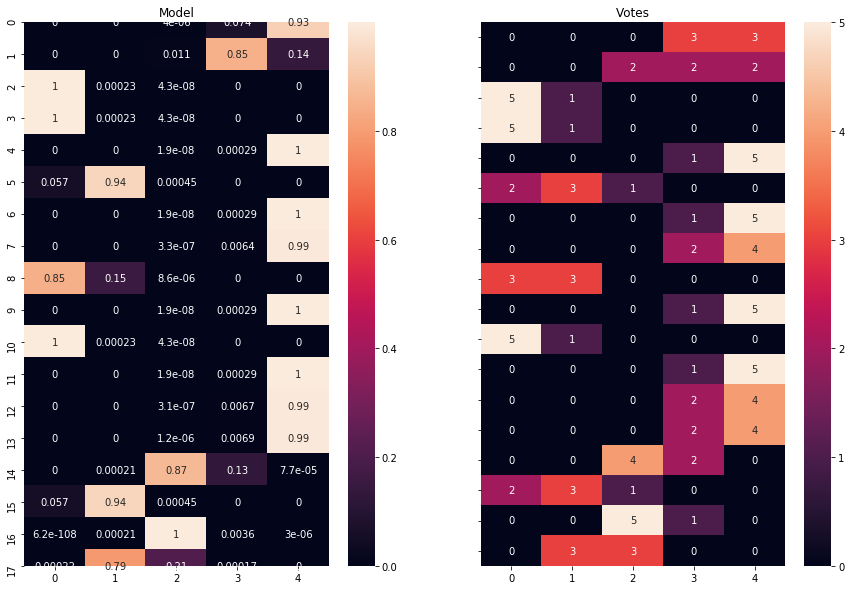

In [78]:
posterior = model.infer_labels(anno.annotations)

votes = []
for r in anno.annotations:
    v = [0] * len(anno.labels)
    votes.append(v)
    for a in r:
        if a > -1:
            v[a] += 1
votes_array = np.array(votes)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)
num_questions = 18

seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
seaborn.heatmap(posterior[:num_questions], annot=True, ax =ax1)
ax1.set_title("Model")
ax2.set_title("Votes")
plt.show()

We can also plot the heatmap by using ModelBt

In [85]:
model = ModelBt.create_initial_state(5, 6)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.72727379 0.77264661 0.65953599 0.66296041 0.85607439 0.67060764]
-222.90595909023008


In [86]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.74820967 0.69989094 0.8873125  0.68171184 0.19418307 0.74940442]
-185.85684341190986


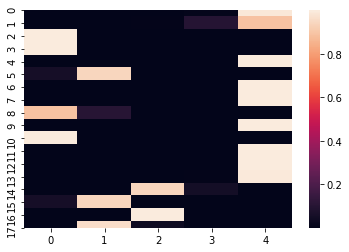

In [87]:
posterior = model.infer_labels(anno.annotations)
ax = seaborn.heatmap(posterior[:18,])
plt.show()

### Visualizing coder accuracy

In [88]:
model = ModelBt.create_initial_state(5, 6)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)#.mean(axis = 1).mean(axis = 1)
y_ci = samples.std(axis=0)#.mean(axis = 1).mean(axis = 1)

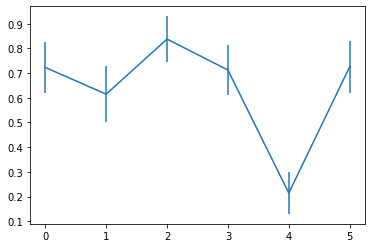

In [89]:
plt.figure()
plt.errorbar(range(6),y, yerr = y_ci)
plt.show()

As expected, coder 5 has the lowest accuracy score among others which we set him as an outlier to make a much clearer visualization. Apart from coder 5 (outlier coder), other coders' accuracy score seems to be around 0.7 which is much higher than the outlier coder. So depending on the ModelBt and its visualization, we can easily tell the coders' accuracy.